### Corpus Statistics and Python Programming

- Name: Chaithra Kopparam Cheluvaiah
- SUID: 326926205
- Email: ckoppara@syr.edu

With the COVID-19 pandemic, people talk about issues related to Coronavirus in various online platforms. These texts help us better understand people’s views and their concerns, and things they care about. As a starting point, you will analyze a subset of text from news/message boards/blogs about CoronaVirus.

### 1. Data

The data you will analyze in this assignment includes two .json files from the free dataset from news/message boards/blogs about CoronaVirus. This dataset has four months data – 5.2 M posts. The time frame of the data is Dec/2019 - March/2020.

Please check out the website https://ieee-dataport.org/open-access/free-dataset-newsmessage-boardsblogs-about-coronavirus-4-month-data-52m-posts for more information about this dataset.

In [ ]:
# loading required libraries
import json
import pandas as pd
import nltk
from nltk.collocations import *
from nltk.util import ngrams
import matplotlib.pyplot as plt
import math

####  LOADING DATA

In [ ]:
# importing data set
corpus_root = 'covid_data.json' # will have to replace this value with your data set file path

# data set is a json file with multiple json object hence iterating over each json object to extract the news/blogs
json_list = []
with open(corpus_root,encoding='utf8') as file_handler:
    for json_obj in file_handler:
        data = json.loads(json_obj)
        json_list.append(data)

In [ ]:
json_list[:1] # viewing single json object to understand the nodes and structure of the json

[{'organizations': [],
  'uuid': '0ad32fb9226b172b960cba62027cd8be7d9dfa22',
  'thread': {'social': {'gplus': {'shares': 0},
    'pinterest': {'shares': 0},
    'vk': {'shares': 0},
    'linkedin': {'shares': 0},
    'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
    'stumbledupon': {'shares': 0}},
   'site_full': 'm.dailyhunt.in',
   'main_image': 'http://assets-news-bcdn.dailyhunt.in/cmd/resize/400x400_60/fetchdata15/images/bb/ef/20/bbef200bb1a714d3de39d36553f7c89f.jpg',
   'site_section': 'https://m.dailyhunt.in/news/india/english/local+state+news-topics-6',
   'section_title': '',
   'url': 'https://m.dailyhunt.in/news/india/english/udayavani+english-epaper-udayaeng/karnataka+helplines+isolation+wards+set+up+for+coronavirus-newsid-162714838',
   'country': 'IN',
   'domain_rank': 14412,
   'title': 'Karnataka: Helplines, isolation wards set up for coronavirus - Udayavani',
   'performance_score': 0,
   'site': 'dailyhunt.in',
   'participants_count': 1,
   'title_full': '',


In [ ]:
df = pd.DataFrame(json_list)

In [ ]:
# viewing first 5 rows to undertand the dataset
df.head()

,organizations,uuid,thread,author,url,ord_in_thread,title,locations,entities,highlightText,language,persons,text,external_links,published,crawled,highlightTitle
0,[],0ad32fb9226b172b960cba62027cd8be7d9dfa22,"{'social': {'gplus': {'shares': 0}, 'pinterest...",Udayavani,https://m.dailyhunt.in/news/india/english/uday...,0,"Karnataka: Helplines, isolation wards set up f...",[],"{'persons': [], 'locations': [{'name': 'karnat...",,english,[],Bengaluru: Isolation wards in hospitals across...,[],2020-01-31T11:46:00.000+02:00,2020-01-31T17:18:04.007+02:00,
1,[],8c3c1e13471a5e6ef7e115588ab27f308285cf2e,"{'social': {'gplus': {'shares': 0}, 'pinterest...",,http://cnnphilippines.com/videos/2020/1/28/Hea...,0,Health dept. monitoring 24 people for possible...,[],"{'persons': [], 'locations': [{'name': 'hubei'...",,english,[],The government making sure that the new corona...,[],2020-01-28T02:00:00.000+02:00,2020-01-31T06:38:31.000+02:00,
2,[],6333601dda63a855f38435ff80ccb89b8ed8c76a,"{'social': {'gplus': {'shares': 0}, 'pinterest...",jmccorm,https://news.ycombinator.com/item?id=22194798#...,88,,[],"{'persons': [], 'locations': [], 'organization...",,english,[],Apart from more people falling sick (as bad as...,[],2020-01-31T06:38:00.000+02:00,2020-01-31T06:39:09.006+02:00,
3,[],4d639ca00ddb638ae57da43712aa50e0e56df2be,"{'social': {'gplus': {'shares': 0}, 'pinterest...",rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,0,Asian Markets Mostly Higher,[],"{'persons': [{'name': 'santos', 'sentiment': '...",,english,[],Asian stock markets are mostly higher on Frida...,[],2020-01-31T05:53:00.000+02:00,2020-01-31T20:00:27.007+02:00,
4,[],624facc68c564b015fcab9a88ed7aaf8ea1e50da,"{'social': {'gplus': {'shares': 0}, 'pinterest...",Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,0,Tesla soars as bearish analysts left with litt...,[],"{'persons': [{'name': 'tesla', 'sentiment': 'n...",,english,[],"Cash flow was also “very strong,” at more than...",[],2020-01-30T02:00:00.000+02:00,2020-01-31T02:55:14.004+02:00,


In [ ]:
df.shape

(10956, 17)

In [ ]:
# understanding columns, column labels, column data types, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   organizations   10956 non-null  object
 1   uuid            10956 non-null  object
 2   thread          10956 non-null  object
 3   author          10956 non-null  object
 4   url             10956 non-null  object
 5   ord_in_thread   10956 non-null  int64 
 6   title           10956 non-null  object
 7   locations       10956 non-null  object
 8   entities        10956 non-null  object
 9   highlightText   10956 non-null  object
 10  language        10956 non-null  object
 11  persons         10956 non-null  object
 12  text            10956 non-null  object
 13  external_links  10956 non-null  object
 14  published       10956 non-null  object
 15  crawled         10956 non-null  object
 16  highlightTitle  10956 non-null  object
dtypes: int64(1), object(16)
memory usage: 1.4+ MB


### 2. Data Pre-processing

You will code in Python to extract the content of the following fields and save it to a CSV file: "facebook":{…}, "title", "published", "replies_count", "author", "url", "country", "text".

Note: regarding the “text” field, you will decide how to process the words, i.e. decide on tokenization and whether to use all lower case, use or modify the stop word list, or lemmatization. Please state why you chose the processing options that you did.

In [ ]:
# extracting more columns
df['facebook'] = df['thread'].apply(lambda t: t['social']['facebook'])
df['replies_count'] = df['thread'].apply(lambda t: t['replies_count'])
df['country'] = df['thread'].apply(lambda t: t['country'])
df['fb_likes'] = df['thread'].apply(lambda t: t['social']['facebook']['likes'])
df['fb_shares'] = df['thread'].apply(lambda t: t['social']['facebook']['shares'])
df['fb_comments'] = df['thread'].apply(lambda t: t['social']['facebook']['comments'])

In [ ]:
temp_df = df[['facebook','title','published','replies_count','author','url','country','text']]

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   facebook       10956 non-null  object
 1   title          10956 non-null  object
 2   published      10956 non-null  object
 3   replies_count  10956 non-null  int64 
 4   author         10956 non-null  object
 5   url            10956 non-null  object
 6   country        10956 non-null  object
 7   text           10956 non-null  object
dtypes: int64(1), object(7)
memory usage: 684.9+ KB


In [ ]:
temp_df.to_csv('out.csv') # writing data to csv file

In [ ]:
# which facebook post has the maximum likes between Dec 2019 - March 2020
df.iloc[df['fb_likes'].argmax()]

organizations                                                    []
uuid                       00b8e8e568534b5247b02e78053e39fecff7877e
thread            {'social': {'gplus': {'shares': 0}, 'pinterest...
author                                                James Nordvik
url               https://newsinfo.inquirer.net/1222157/robredo-...
ord_in_thread                                                     0
title             Re: Robredo to gov't: Impose China-wide travel...
locations                                                        []
entities          {'persons': [{'name': 'robredo', 'sentiment': ...
highlightText                                                      
language                                                    english
persons                                                          []
text              BREAKING: DOH confirms first case of novel cor...
external_links                                                   []
published                             2020-01-30

In [ ]:
df.iloc[df['fb_likes'].argmax()]['title']

"Re: Robredo to gov't: Impose China-wide travel ban now | Inquirer News"

In [ ]:
# which facebook post has the maximum shares between Dec 2019 - March 2020
df.iloc[df['fb_shares'].argmax()]

organizations                                                    []
uuid                       b439da3de5784a0f6ca54bdf1e70c6165936c760
thread            {'social': {'gplus': {'shares': 0}, 'pinterest...
author                                                    besguerra
url               https://newsinfo.inquirer.net/1222232/employee...
ord_in_thread                                                     0
title             Employees of Negros Oriental hotel, resort whe...
locations                                                        []
entities          {'persons': [{'name': 'pascobello', 'sentiment...
highlightText                                                      
language                                                    english
persons                                                          []
text              The coronavirus patient, a 38-year-old Chinese...
external_links                                                   []
published                             2020-01-31

In [ ]:
df.iloc[df['fb_shares'].argmax()]['title']

'Employees of Negros Oriental hotel, resort where Chinese with nCoV stayed now on quarantine'

In [ ]:
# which facebook post has the maximum comments between Dec 2019 - March 2020
df.iloc[df['fb_comments'].argmax()]

organizations                                                    []
uuid                       3c5ce8430fc0b0f5356fa18d9bb23847902e4368
thread            {'social': {'gplus': {'shares': 0}, 'pinterest...
author                                                             
url                 https://www.bbc.co.uk/news/uk-politics-51315772
ord_in_thread                                                     0
title             Brexit: Boris Johnson to hail 'dawn of a new e...
locations                                                        []
entities          {'persons': [{'name': 'boris johnson', 'sentim...
highlightText                                                      
language                                                    english
persons                                                          []
text              Media playback is unsupported on your device M...
external_links                                                   []
published                             2020-01-30

In [ ]:
df.iloc[df['fb_comments'].argmax()]['title'] 

"Brexit: Boris Johnson to hail 'dawn of a new era' - BBC News"

In [ ]:
# which countries are present in the corpus
df['country'].unique()

array(['IN', 'US', 'CA', 'DE', 'GB', 'AU', 'TV', 'PH', 'CN', 'ZA', 'RU',
       'SG', 'VE', 'MY', 'NL', 'IE', 'NO', 'FR', 'SB', 'CZ', 'TR', 'PK',
       'SO', 'AE', 'KS', 'CO', 'TW', '', 'LK', 'TH', 'BA', 'NG', 'ES',
       'FJ', 'AR', 'BR', 'HK', 'KE', 'UK', 'JP', 'VN', 'ZW', 'NZ', 'IT',
       'MO', 'AF', 'MA', 'CH', 'PG', 'MH', 'GR', 'HR', 'KR', 'BG', 'FM',
       'MC', 'RO', 'UA', 'HW', 'CL', 'EU', 'SA', 'RW', 'MM', 'MX', 'DK',
       'NA', 'LU', 'SE', 'UG', 'AL', 'HU', 'ID', 'MU', 'CW', 'BM', 'AT',
       'KH', 'GE', 'JO', 'FI', 'ME', 'BB', 'AM', 'BY', 'EE', 'LV', 'IL',
       'BT', 'BE', 'GA', 'PT', 'IR', 'LB', 'VU', 'DM', 'GI', 'TO', 'CR',
       'MK', 'CM', 'MT', 'QA', 'PL', 'EC'], dtype=object)

In [ ]:
# which country has highest number of news/blogs about covid
df['country'].value_counts()

US    5729
GB     803
IN     584
CA     496
AU     490
      ... 
AL       1
MC       1
MH       1
AF       1
EC       1
Name: country, Length: 105, dtype: int64

<AxesSubplot:>

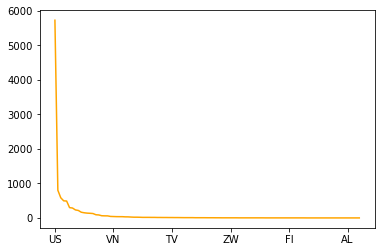

In [ ]:
df['country'].value_counts().plot(color='orange')

In [ ]:
# which news/blog source is actively engaging in reporting details about the virus
df['author'].value_counts()

                                                            3285
The Canadian Press                                           225
MarketScreener                                               132
Midwest Communications Inc.                                  131
admin                                                        116
                                                            ... 
Kim Slowey, Jennifer Goodman                                   1
Lawrence Jugmohan                                              1
staronline@reachplc.com (Jenny Kirkham, Douglas Patient)       1
news@gazettemedia.co.uk (Elaine Blackburne)                    1
Silvia Alexandra Arcos Cobo                                    1
Name: author, Length: 3529, dtype: int64

In [ ]:
df['text']

0        Bengaluru: Isolation wards in hospitals across...
1        The government making sure that the new corona...
2        Apart from more people falling sick (as bad as...
3        Asian stock markets are mostly higher on Frida...
4        Cash flow was also “very strong,” at more than...
                               ...                        
10951    Home > News Hub > AFTA CEO Update - General ad...
10952    A test carried out on a passenger from Macau a...
10953    research (133) The Bow Group calls for an Emer...
10954    Ethiopia coronavirus suspects test negative Da...
10955    robert maseka Namibian students studying in Ch...
Name: text, Length: 10956, dtype: object

In [ ]:
# tokenizing the text column
raw_data = ' '.join(df['text'])
tokens = nltk.word_tokenize(raw_data)
tokens[:10] # viewing first 10 tokens to understang the data

['Bengaluru',
 ':',
 'Isolation',
 'wards',
 'in',
 'hospitals',
 'across',
 'Karnataka',
 'and',
 'helpline']

In [ ]:
tokens.count('corona')

305

In [ ]:
tokens.count('Corona')

401

Two words "Corona" and "corona" are being tokenized as different words. Need to covert the tokens to lowercase in order to have consistency with rest of the corpus statistics.

In [ ]:
# lowercase transforamtion
transformed_tokens = [t.lower() for t in tokens]

In [ ]:
len(tokens) # getting insight about total number of tokens in the news/blogs

6914084

In [ ]:
len(transformed_tokens) # total number of tokens should remian same even after lowecase transformation

6914084

**Examining the context of the corupus to understand what the corpus i.e., news/blogs are being written about.**

In [ ]:
text = nltk.Text(transformed_tokens)

In [ ]:
text.concordance('corona')

Displaying 25 of 718 matches:
face masks in bambang following the corona virus outbreak ( rio deluvio / mani
with 600 indians living in china 's corona virus-hit hubei province , national
wuhan , the site of the outbreak of corona virus . this mission begins today w
 . the death toll in china 's novel corona virus outbreak reached 21 ... by me
 that have a halo , or crown-like ( corona ) appearance when viewed under an e
 that have a halo , or crown-like ( corona ) appearance when viewed under an e
s kuf , reish , vav , nun and hey . corona . he also points out other highligh
 virus , which impart the look of a corona surrounding the virion , when viewe
k on the last day of the week . the corona virus has not yet been controlled i
k on the last day of the week . the corona virus has not yet been controlled i
 that have a halo , or crown like ( corona ) appearance when viewed under an e
 district administration have setup corona virus isolation unit at tehsil head
 district administrati

In [ ]:
text.similar('corona')

the wuhan a china coronavirus this that and new it virus chinese
deadly flu who in but infection people as


In [ ]:
text.common_contexts(['corona','coronavirus'])

the_virus novel_virus for_virus deadly_virus wuhan_virus with_the
the_infected the_infection the_symptoms of_anxiety of_has of_infected
the_outbreak keyword_beer latest_virus beer_which the_i of_have
about_and the_turned


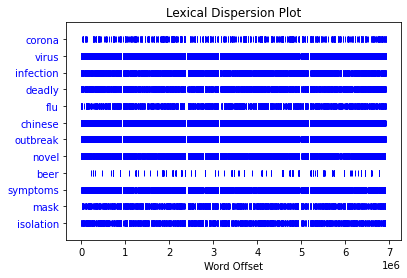

In [ ]:
text.dispersion_plot(['corona','virus','infection','deadly','flu','chinese','outbreak','novel','beer','symptoms','mask',
                      'isolation'])

In [ ]:
# checking for numeric values in the corpus
num_vals = [word for word in transformed_tokens if word.isnumeric()]
num_vals[:50]

# few of them seems to be the year - 2020, 2019, 2003, 2002

len(num_vals)

93885

In [ ]:
num_freq = nltk.FreqDist(num_vals)
num_freq.most_common(20)

# news/blogs are talking a lot about the years 2020

[('2020', 10993),
 ('30', 4326),
 ('31', 3921),
 ('2019', 3466),
 ('1', 3270),
 ('10', 2292),
 ('14', 2170),
 ('2', 2140),
 ('170', 2104),
 ('213', 1815),
 ('3', 1749),
 ('20', 1717),
 ('5', 1660),
 ('200', 1574),
 ('4', 1498),
 ('11', 1392),
 ('29', 1389),
 ('50', 1284),
 ('18', 1253),
 ('100', 1232)]

In [ ]:
# checking the context for few top numeric values 2020,30,31,2019
text.concordance('2020')

Displaying 25 of 10993 matches:
000 delivery threshold for full-year 2020 is well within reach as now , based 
ensus . with net debt also lower and 2020 volume guidance above 500,000 there 
ng metrics was underwhelming , while 2020 delivery guidance could be viewed as
 the coronavirus outbreak . jan 30 , 2020 , 8:49 pm advertisement loading ... 
 reduce china ’ s real gdp growth in 2020 by 0.5-1.5 percentage points against
baseline forecast of 5.9 per cent in 2020 . further , the assessment showed th
aptor & his wife dead economicsurvey 2020 to be presented in both houses as bu
 and the company has warned that its 2020 earnings would be impacted by cancel
alison rourke ( earlier ) fri 31 jan 2020 20.48 gmt first published on fri 31 
48 gmt first published on fri 31 jan 2020 02.21 gmt share on facebook share on
lesbrough fc ( @ boro ) january 31 , 2020 8.42pm – former man utd youngster ra
 peach ( @ simonpeach ) january 31 , 2020 7.54pm – wolves ’ newest signing spe
n ( @ luke_matheson4

In [ ]:
text.concordance('30',lines=10) # corona outbreak on the day jan 30 , 2020

Displaying 10 of 4326 matches:
ake of the coronavirus outbreak . jan 30 , 2020 , 8:49 pm advertisement loadin
 petri at jpetri4 @ bloomberg.net jan 30 , 2020 / 03:26 pm est / updated : jan
, 2020 / 03:26 pm est / updated : jan 30 , 2020 / 03:27 pm est atlanta , ga – 
al china ’ s hubei province , on jan. 30 , 2020 . ( xinhua/li he ) wuhan , jan
 pm2.5 dust in the atmosphere . about 30 million face masks are produced each 
 / ap originally published on january 30 , 2020 4:43 pm updated at 9:40 p.m . 
sia , '' the office said . on january 30 , the world health organization ( who
. latest articles photo taken on jan. 30 , 2020 shows a press conference held 
 ( xinhua/chen junxia ) geneva , jan. 30 -- world health organization ( who ) 
ast china 's shandong province , jan. 30 , 2020 . in order to ensure the suffi


In [ ]:
text.concordance('31',lines=10) # corona outbreak on the day jan 31 , 2020

Displaying 10 of 3921 matches:
yle and alison rourke ( earlier ) fri 31 jan 2020 20.48 gmt first published on
2020 20.48 gmt first published on fri 31 jan 2020 02.21 gmt share on facebook 
— middlesbrough fc ( @ boro ) january 31 , 2020 8.42pm – former man utd youngs
 simon peach ( @ simonpeach ) january 31 , 2020 7.54pm – wolves ’ newest signi
atheson ( @ luke_matheson41 ) january 31 , 2020 7.50pm – man utd may not have 
anchester united ( @ manutd ) january 31 , 2020 7.39pm – and another ! sheffie
 united ( @ sheffieldunited ) january 31 , 2020 7.30pm- we have some completed
heson ! — wolves ( @ wolves ) january 31 , 2020 7.20pm – that said , a slip of
manchester city ( @ mancity ) january 31 , 2020 6.35pm – another tottenham pla
b55 — emre can ( @ emrecan_ ) january 31 , 2020 6.04pm – premier league-chasin


In [ ]:
text.concordance('2019',lines=10)

Displaying 10 of 3466 matches:
 the guidance given at first quarter 2019 . cautious on chasing the stock amid
vergrande dethroned shanghai sipg in 2019 , finishing just two points ahead of
r urgent research . ebola , 2014 and 2019 - the deadly disease has twice been 
growth stayed the same at the end of 2019 . a key slice of the u.s. yield curv
irus has been ongoing since december 2019 , ” a u.s. centers for disease contr
 5 % , or even lower , from 6.1 % in 2019 . china has extended the lunar new y
ctiveness against viruses similar to 2019 novel coronavirus ( 2019-ncov ) on h
s surfaces , and can be used against 2019 novel coronavirus ( 2019-ncov ) when
lippines now has its first confirmed 2019 novel coronavirus ( ncov ) case . pe
ational health emergency was in july 2019 over the ebola outbreak in the democ


**LEXICAL DIVERSITY**

In [ ]:
len(transformed_tokens)

6914084

There are 6,914,084 tokens in the corpus.

**Finding Vocabulary size**

In [ ]:
unique_tokens = set(transformed_tokens)
len(unique_tokens)

103331

**Fidning type to token tatio (TTR) to understand lexical richness of the data.**

closer the TTR ratio to 1, greater the lexical richness of the segment.

In [ ]:
len(set(transformed_tokens))/len(transformed_tokens)

0.014945002114524498

In [ ]:
# occurrences of the word 'corona' as a percentage of all tokens
100* text.count('corona')/len(text)

0.010384600476361005

In [ ]:
# average number of characters per token
len(raw_data)/len(transformed_tokens)

5.295715527899285

### 3. Data Analysis

To get a rough understanding of what these texts were about, you will perform the following three tasks on the pre-processed data:
- list the top 50 words by frequency
- list the top 50 bigrams by frequencies, and
- list the top 50 bigrams by their Mutual Information scores (using min frequency 5)
- list the top 50 content words in the context of the word “Covid”. Please explain how you define the context in your study

In [ ]:
# removing punctiatons/numbers since we need to find only top 50 repeating words
words = [t for t in transformed_tokens if t.isalpha()] # keep alpha tokens
words[:20]

['bengaluru',
 'isolation',
 'wards',
 'in',
 'hospitals',
 'across',
 'karnataka',
 'and',
 'helpline',
 'to',
 'take',
 'calls',
 'on',
 'queries',
 'are',
 'ready',
 'to',
 'prevent',
 'any',
 'further']

#### 3.1 List the top 50 words by frequency

In [ ]:
# before removing stop words
freq = nltk.FreqDist(words)
freq.most_common(50)

[('the', 347371),
 ('to', 172838),
 ('of', 144866),
 ('and', 134963),
 ('in', 134603),
 ('a', 113522),
 ('on', 55732),
 ('that', 54685),
 ('is', 54186),
 ('for', 53735),
 ('china', 45836),
 ('from', 42437),
 ('with', 40031),
 ('said', 39956),
 ('as', 37673),
 ('it', 36159),
 ('are', 34955),
 ('have', 34639),
 ('coronavirus', 34398),
 ('at', 33912),
 ('has', 31794),
 ('be', 27579),
 ('virus', 27324),
 ('health', 26792),
 ('s', 25596),
 ('by', 24751),
 ('was', 23950),
 ('this', 23908),
 ('who', 22748),
 ('we', 22309),
 ('will', 21144),
 ('people', 21049),
 ('more', 19733),
 ('not', 19730),
 ('new', 19472),
 ('been', 19023),
 ('an', 17702),
 ('outbreak', 17486),
 ('wuhan', 17479),
 ('but', 17214),
 ('he', 16588),
 ('or', 16283),
 ('its', 16260),
 ('cases', 15863),
 ('they', 15854),
 ('chinese', 13860),
 ('all', 13690),
 ('also', 13538),
 ('there', 13460),
 ('were', 13369)]

Removing Stop Words and Non-Alphabetical Tokens

In [ ]:
# converting raw data to nltk.Text
nltk_stops = nltk.corpus.stopwords.words('english')

# stop words cannot be considered content words hence removing 
revised_tokens = [t for t in transformed_tokens if t not in nltk_stops] 

# punctuation, non-aplhabetical tokens cannot be considered content words hence removing
revised_tokens = [rev_token for rev_token in revised_tokens if rev_token.isalpha()] 

revised_tokens

['bengaluru',
 'isolation',
 'wards',
 'hospitals',
 'across',
 'karnataka',
 'helpline',
 'take',
 'calls',
 'queries',
 'ready',
 'prevent',
 'spread',
 'virus',
 'first',
 'case',
 'india',
 'reported',
 'kerala',
 'yesterday',
 'chief',
 'secretary',
 'state',
 'government',
 'thursday',
 'held',
 'meeting',
 'additional',
 'chief',
 'secretary',
 'health',
 'health',
 'commissioner',
 'mission',
 'director',
 'national',
 'health',
 'mission',
 'health',
 'department',
 'officials',
 'reviewed',
 'state',
 'preparedness',
 'tackle',
 'cases',
 'coronavirus',
 'whenever',
 'reported',
 'rajiv',
 'gandhi',
 'institute',
 'chest',
 'diseases',
 'rgicd',
 'beds',
 'wenlock',
 'hospital',
 'mangaluru',
 'beds',
 'selected',
 'treatment',
 'virus',
 'district',
 'hospitals',
 'five',
 'beds',
 'isolated',
 'patients',
 'carrying',
 'virus',
 'along',
 'least',
 'ten',
 'private',
 'hospitals',
 'bengaluru',
 'setting',
 'similar',
 'isolation',
 'wards',
 'national',
 'institute',
 'vir

In [ ]:
# after removing stop words
freq1 = nltk.FreqDist(revised_tokens)
freq1.most_common(50)

[('china', 45836),
 ('said', 39956),
 ('coronavirus', 34398),
 ('virus', 27324),
 ('health', 26792),
 ('people', 21049),
 ('new', 19472),
 ('outbreak', 17486),
 ('wuhan', 17479),
 ('cases', 15863),
 ('chinese', 13860),
 ('also', 13538),
 ('spread', 12241),
 ('world', 10995),
 ('thursday', 10270),
 ('travel', 10149),
 ('first', 9825),
 ('countries', 9656),
 ('global', 9245),
 ('would', 8973),
 ('confirmed', 8907),
 ('one', 8661),
 ('year', 8376),
 ('emergency', 8108),
 ('two', 8051),
 ('flights', 7787),
 ('friday', 7731),
 ('public', 7724),
 ('january', 7596),
 ('government', 7454),
 ('news', 7386),
 ('international', 7174),
 ('could', 7173),
 ('us', 7121),
 ('city', 6904),
 ('reported', 6903),
 ('disease', 6653),
 ('including', 6522),
 ('last', 6104),
 ('week', 6092),
 ('may', 5928),
 ('country', 5877),
 ('time', 5859),
 ('infected', 5669),
 ('market', 5434),
 ('case', 5322),
 ('flight', 5322),
 ('symptoms', 5306),
 ('medical', 5301),
 ('officials', 5297)]

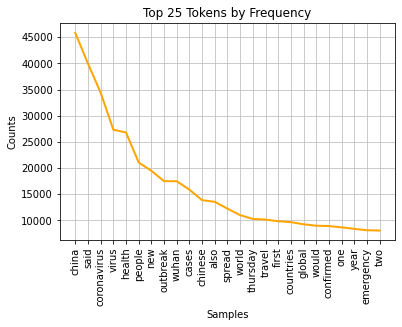

<AxesSubplot:title={'center':'Top 25 Tokens by Frequency'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# zipf's law - plot should show decreasing pattern because of zipf's law. 
# the amount of times a word is used is inversely proportional to rank. 

freq1.plot(25, title="Top 25 Tokens by Frequency", color='orange')

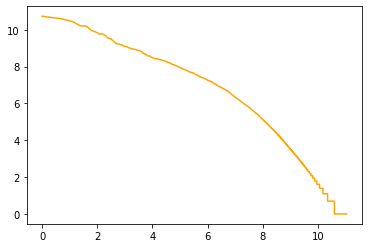

In [ ]:
# word frequency and ranking on a log scale follows a nice straight line with negative slope  → power law

log_freqs = [math.log(v) for v in sorted(freq1.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks,log_freqs, color='orange') # Show the result

In [ ]:
# words 
freq1.hapaxes()[:10]

['sahayavani',
 'udayavani',
 'spak',
 'houchois',
 'itay',
 'michaeli',
 'macquaire',
 'benguet',
 'hindrance',
 'nazia']

In [ ]:
len(freq1.hapaxes())

22366

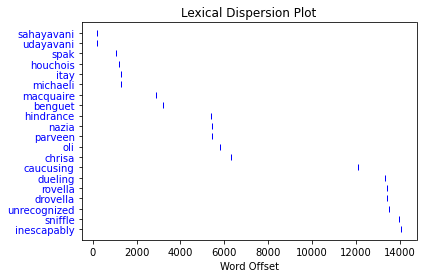

In [ ]:
# visualizing hapaxes
text.dispersion_plot(freq1.hapaxes()[:20])

#### 3.2 List the top 50 bigrams by frequencies

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

# constructing bigrams for the given tokens
bigram_finder = nltk.BigramCollocationFinder.from_words(revised_tokens)

# returns pairs (ngram, score) ordered from highest to lowest score
bigram_scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [ ]:
bigram_scores[:50]

[(('world', 'health'), 0.0015611564902055584),
 (('coronavirus', 'outbreak'), 0.001511235788483869),
 (('public', 'health'), 0.0013451359991189752),
 (('novel', 'coronavirus'), 0.0013018713909601779),
 (('health', 'organization'), 0.0011569500811135765),
 (('new', 'virus'), 0.0011027936834882286),
 (('health', 'emergency'), 0.0010613443735738564),
 (('confirmed', 'cases'), 0.0010546882800109643),
 (('location', 'text'), 0.0010413760928851806),
 (('hong', 'kong'), 0.0009844967478931951),
 (('united', 'states'), 0.0009651335666193277),
 (('new', 'coronavirus'), 0.000904321075431088),
 (('hubei', 'province'), 0.0008117408649654094),
 (('flights', 'china'), 0.0006910235317111425),
 (('travel', 'china'), 0.0006870903855148881),
 (('per', 'cent'), 0.0006701476019002542),
 (('health', 'officials'), 0.000623857496667415),
 (('global', 'health'), 0.0006123606077860562),
 (('death', 'toll'), 0.0006111504089564395),
 (('global', 'emergency'), 0.0006044943153935476),
 (('spread', 'virus'), 0.00057

In [ ]:
# visualizing bigrams
def visualize_bigrams_topn(scores:list,n:int):
    x_val = []
    y_val = []
    for bigram in scores[n::-1]:
        x_val.append(' '.join(bigram[0]))
        y_val.append(bigram[1])
    plt.figure(figsize=(10,10))
    plt.barh(x_val,y_val,color='orange')

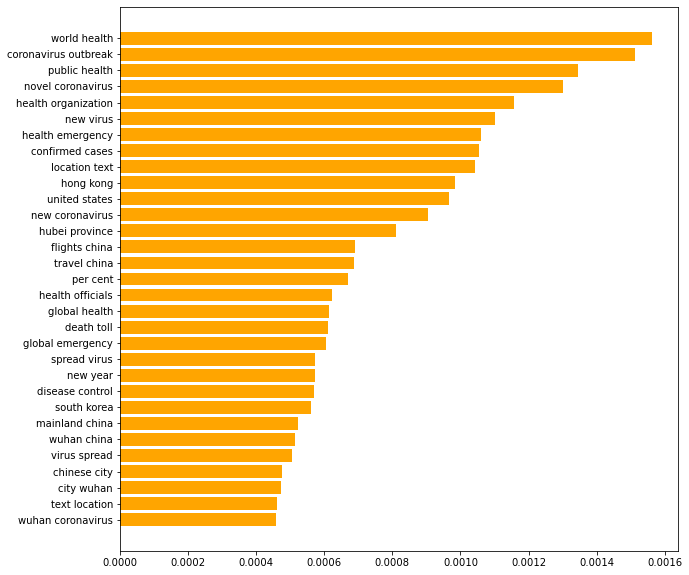

In [ ]:
visualize_bigrams_topn(bigram_scores,30)

#### 3.3 List the top 50 bigrams by their Mutual Information scores (using min frequency 5)

In [ ]:
bigram_finder.apply_freq_filter(5) # Removes ngrams that have frequency less than 5
bigram_pmis = bigram_finder.score_ngrams(bigram_measures.pmi)
bigram_pmis[:50]

[(('agus', 'putranto'), 19.334396379881845),
 (('billows', 'chimney'), 19.334396379881845),
 (('bosnia', 'herzegovina'), 19.334396379881845),
 (('brion', 'mcclanahan'), 19.334396379881845),
 (('chinesedon', 'tcometojapan'), 19.334396379881845),
 (('cle', 'elum'), 19.334396379881845),
 (('haruhiko', 'kuroda'), 19.334396379881845),
 (('motilal', 'oswal'), 19.334396379881845),
 (('nayanika', 'sengupta'), 19.334396379881845),
 (('nenad', 'lalovic'), 19.334396379881845),
 (('rodong', 'sinmun'), 19.334396379881845),
 (('samdech', 'techo'), 19.334396379881845),
 (('terawan', 'agus'), 19.334396379881845),
 (('viêm', 'phổi'), 19.334396379881845),
 (('yoruk', 'bahceli'), 19.334396379881845),
 (('abul', 'kalam'), 19.07136197404805),
 (('bryn', 'mawr'), 19.07136197404805),
 (('claudio', 'galimberti'), 19.07136197404805),
 (('cristiano', 'ronaldo'), 19.07136197404805),
 (('goss', 'barrington'), 19.07136197404805),
 (('gunjan', 'banerji'), 19.07136197404805),
 (('henrik', 'lundqvist'), 19.0713619740

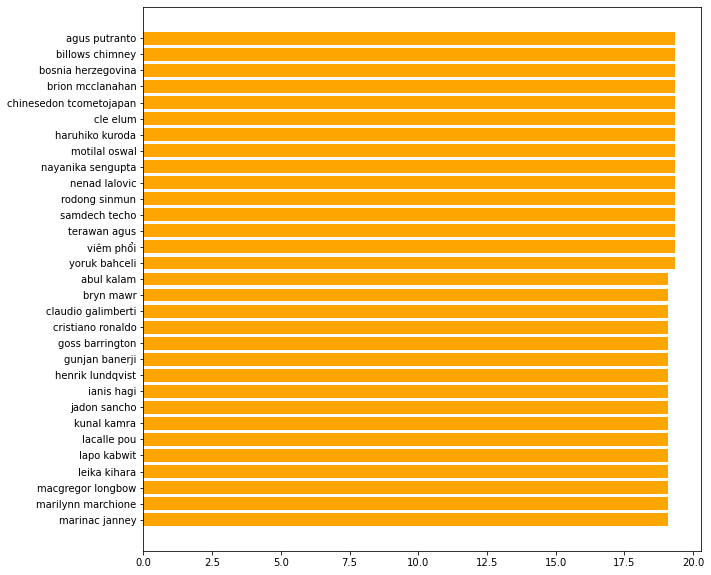

In [ ]:
visualize_bigrams_topn(bigram_pmis,30)

#### 3.4 list the top 50 content words in the context of the word “Covid”. Please explain how you define the context in your study

In [ ]:
rev_text = nltk.Text(revised_tokens)
rev_text

<Text: bengaluru isolation wards hospitals across karnataka helpline take...>

In [ ]:
# revised_tokens do not have stop words, punctuations, and non-alphabetical tokens
# hence, we already have content words in 'revised_tokens' variable

# but, we need to find content words that are in context of 'corona'

In [ ]:
rev_text.similar('corona',50) 
#similar() returns the tokens with higher simiar words in the beginning and lower similar word in the end

new wuhan spread deadly coronavirus china outbreak cases novel virus
symptoms sars contracted respiratory infected spreading said far
contracting zika transmission case contain flu risk ebola transmit
beer people fears confirmed diagnosed reported carrying declared
influenza control time impact fear tested killer information since
know infection caused deaths exposed prevent


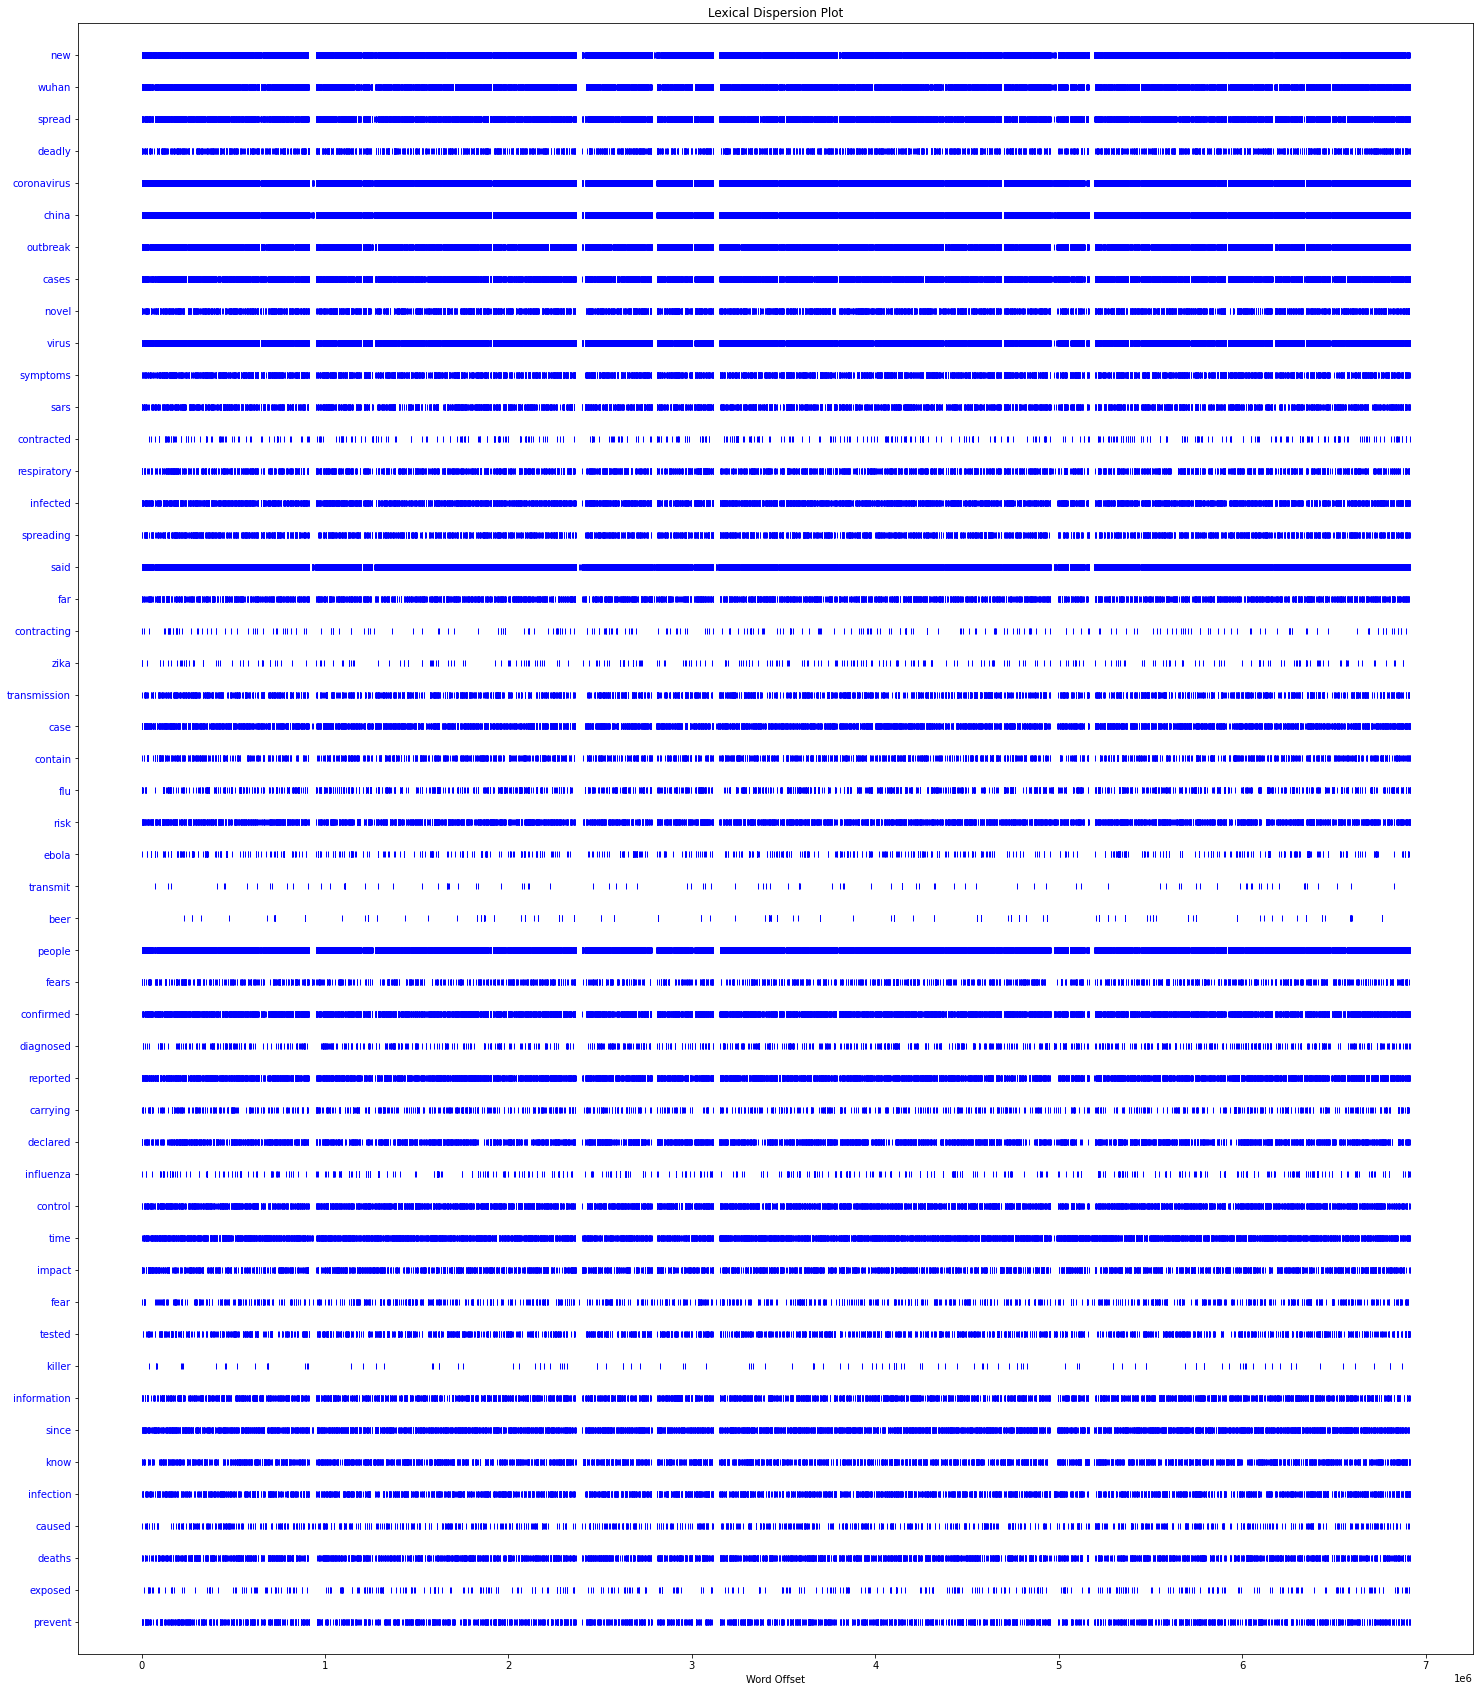

In [ ]:
# dispersion plot of similar words found in the previous step
plt.figure(figsize=(25, 30)) 
text.dispersion_plot(["new","wuhan","spread","deadly","coronavirus","china","outbreak","cases","novel","virus","symptoms",
                      "sars","contracted","respiratory","infected","spreading","said","far","contracting","zika","transmission",
                      "case","contain","flu","risk","ebola","transmit","beer","people","fears","confirmed","diagnosed",
                      "reported","carrying","declared","influenza","control","time","impact","fear","tested","killer",
                      "information","since","know","infection","caused","deaths","exposed","prevent"])